# Instalation

# Code

In [23]:
import math
import numpy as np
import pandas as pd
import bagpipes as pipes
from astropy.table import Table
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.max_columns', None)
from matplotlib import rc
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["figure.figsize"] = (13,11)
plt.rcParams["font.size"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.labelsize"] = 13
plt.rcParams["ytick.labelsize"] = 13
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams['axes.linewidth'] = 2.0

## Read id tables and concat columns

In [2]:
# import glob
# from astropy.table import Table, vstack

# # Get a list of all the id_*.txt tables
# id_tables = glob.glob('data/id_*.txt')

# # Read and concatenate the tables
# concatenated_table = Table()
# for table_file in id_tables:
#     table = Table.read(table_file, format='ascii')
#     concatenated_table = vstack([concatenated_table, table])

# # Print the concatenated table
# print(concatenated_table)

# # Save the concatenated table
# concatenated_table.write('data/MaNGA_AGNs.csv', format='csv', overwrite=True)
# print(concatenated_table.colnames)

# list = ['id', 'redshift', 'herschel.spire.PLW', 'herschel.spire.PLW_err', 'herschel.spire.PMW', 'herschel.spire.PMW_err', 'herschel.spire.PSW', 'herschel.spire.PSW_err', 'herschel.pacs.160', 'herschel.pacs.160_err', 'herschel.pacs.100', 'herschel.pacs.100_err', 'spitzer.mips.24', 'spitzer.mips.24_err', 'WISE4', 'WISE4_err', 'WISE3', 'WISE3_err', 'WISE2', 'WISE2_err', 'WISE1', 'WISE1_err', '2mass.Ks', '2mass.Ks_err', '2mass.H', '2mass.H_err', '2mass.J', '2mass.J_err', 'PAN-STARRS_y', 'PAN-STARRS_y_err', 'SDSS.z', 'SDSS.z_err', 'SDSS.i', 'SDSS.i_err', 'SDSS.r', 'SDSS.r_err', 'SDSS.g', 'SDSS.g_err', 'SDSS.u', 'SDSS.u_err', 'galex.NUV', 'galex.NUV_err', 'galex.FUV', 'galex.FUV_err', 'VLA_L', 'VLA_L_err', 'VLA_C', 'VLA_C_err', 'L18W', 'L18W_err', 'S9W', 'S9W_err', 'spitzer.irac.ch4', 'spitzer.irac.ch4_err', 'spitzer.irac.ch3', 'spitzer.irac.ch3_err', 'spitzer.irac.ch2', 'spitzer.irac.ch2_err', 'spitzer.irac.ch1', 'spitzer.irac.ch1_err']

# group_with_err = []
# group_without_err = []

# for name in list:
#     if name.endswith('_err'):
#         group_with_err.append(name)
#     elif name not in ['id', 'redshift']:
#         group_without_err.append(name)

# print("Group with _err:", group_with_err)
# print("Group without _err:", group_without_err)



In [3]:
filter_list = ['filters/PANDA/PLW.dat','filters/PANDA/PMW.dat', 'filters/PANDA/PSW.dat', 'filters/PANDA/100.dat', 'filters/PANDA/160.dat', 
               'filters/PANDA/spitzer.mips.24.dat', 
               'filters/PANDA/WISE4.dat', 'filters/PANDA/WISE3.dat', 'filters/PANDA/WISE2.dat', 'filters/PANDA/WISE1.dat', 
               'filters/PANDA/Ks_2mass.dat', 'filters/PANDA/H_2mass.dat', 'filters/PANDA/J_2mass.dat', 
               'filters/PANDA/PAN-STARRS_y.dat', 
               'filters/PANDA/z_prime.dat', 'filters/PANDA/i_prime.dat', 'filters/PANDA/r_prime.dat', 'filters/PANDA/g_prime.dat', 'filters/PANDA/u_prime.dat',  
               'filters/PANDA/NUV.dat', 'filters/PANDA/FUV.dat', 
               'filters/PANDA/VLA_L.dat', 'filters/PANDA/VLA_C.dat',
               'filters/PANDA/L18W.dat', 'filters/PANDA/S9W.dat',
               'filters/PANDA/IRAC4.dat', 'filters/PANDA/IRAC3.dat', 'filters/PANDA/IRAC2.dat', 'filters/PANDA/IRAC1.dat']

mags = ['herschel.spire.PLW', 'herschel.spire.PMW', 'herschel.spire.PSW', 'herschel.pacs.160', 'herschel.pacs.100', 
        'spitzer.mips.24', 
        'WISE4', 'WISE3', 'WISE2', 'WISE1', 
        '2mass.Ks', '2mass.H', '2mass.J', 
        'PAN-STARRS_y', 
        'SDSS.z', 'SDSS.i', 'SDSS.r', 'SDSS.g', 'SDSS.u', 
        'galex.NUV', 'galex.FUV', 
        'VLA_L', 'VLA_C', 
        'L18W', 'S9W', 
        'spitzer.irac.ch4', 'spitzer.irac.ch3', 'spitzer.irac.ch2', 'spitzer.irac.ch1']

mags_err = ['herschel.spire.PLW_err', 'herschel.spire.PMW_err', 'herschel.spire.PSW_err', 'herschel.pacs.160_err', 'herschel.pacs.100_err', 
            'spitzer.mips.24_err', 
            'WISE4_err', 'WISE3_err', 'WISE2_err', 'WISE1_err', 
            '2mass.Ks_err', '2mass.H_err', '2mass.J_err', 
            'PAN-STARRS_y_err', 
            'SDSS.z_err', 'SDSS.i_err', 'SDSS.r_err', 'SDSS.g_err', 'SDSS.u_err', 
            'galex.NUV_err', 'galex.FUV_err', 
            'VLA_L_err', 'VLA_C_err', 
            'L18W_err', 'S9W_err', 
            'spitzer.irac.ch4_err', 'spitzer.irac.ch3_err', 'spitzer.irac.ch2_err', 'spitzer.irac.ch1_err']



In [ ]:
exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

model = pipes.model_galaxy(model_components, filt_list=filter_list, spec_wavs=np.arange(0., 10000., 5.))
fig = model.plot()
fig = model.sfh.plot()

In [ ]:
df = pd.read_csv('data/id_3C286.txt')
print(df.columns)

def load_data_manga(id):
        print(id)
        # try:
        #     object, field = id.split('_')
        # except:
        #     object1, object2, field = id.split('_')
        #     object = object1 + '_' + object2

        fluxes = []
        fluxerrs = []
        galaxy_param = df[(df['id'] == id)]
        #print(galaxy_param[mags])
        #print(galaxy_param[mags_err])

        for k in range(0, len(mags)):
            f = galaxy_param[mags[k]]
            delta_f = galaxy_param[mags_err[k]]
            if (math.isnan(f.values)) | (f.values == np.inf) | (f.values == 99.) | (f.values == -99.):
                f = np.array([99.])
                delta_f = np.array([99.])
            # else:
            #     f = 10**(9.56) * 10**(-m/2.5)  # flux in mJy
            #     delta_m = galaxy_param[mags_err[k]]
            #     delta_f = f * (1/2.5) * np.log(10) * delta_m

            #print(m, delta_m, f, delta_f)

            fluxes.append(f)  #mJy
            fluxerrs.append(delta_f)  #mJy
        photometry = np.c_[fluxes, fluxerrs]

        print(photometry)
        print(len(photometry))
        return photometry

# Double power law fitting

3C286
[[9.22000000e+01 1.25402711e+01]
 [8.70000000e+01 1.19553335e+01]
 [7.18000000e+01 1.04552571e+01]
 [7.03000000e+01 4.59410590e+01]
 [6.16000000e+01 4.40330058e+01]
 [7.86000000e+00 7.86254412e-01]
 [9.56000000e+00 1.34072219e+00]
 [3.03000000e+00 3.29710479e-01]
 [1.71000000e+00 1.75616058e-01]
 [1.20000000e+00 1.23693169e-01]
 [9.45000000e-01 1.09846484e-01]
 [5.86000000e-01 8.97661406e-02]
 [6.62000000e-01 7.68338467e-02]
 [5.65000000e-01 5.65795900e-02]
 [5.46000000e-01 5.49286810e-02]
 [4.76000000e-01 4.76944441e-02]
 [4.47000000e-01 4.47447204e-02]
 [4.26000000e-01 4.26469225e-02]
 [3.59000000e-01 3.60251301e-02]
 [3.00000000e-01 3.16227766e-02]
 [9.26000000e-02 1.27058097e-02]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]]
29

Bagpipes: fitting object 3C286



/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/star_formation_history.py:270: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1


ValueError: zero-size array to reduction operation minimum which has no identity

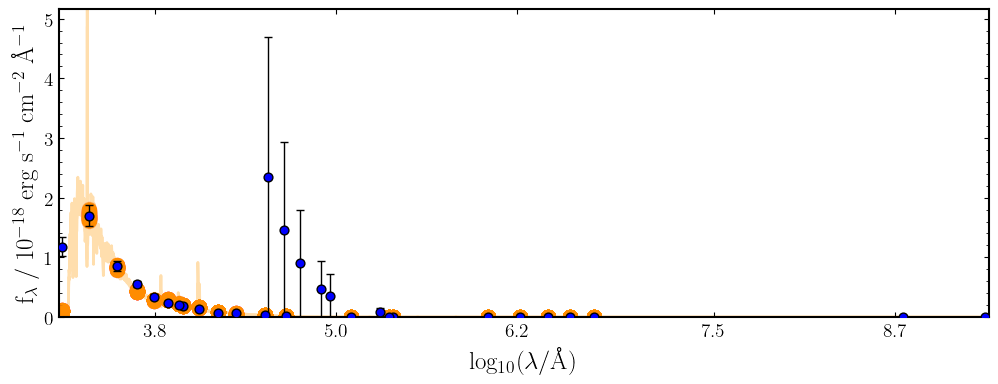

In [18]:
dblplaw = {}                         # double-power-law
dblplaw["tau"] = (0., 15.) # Vary the time of peak star-formation between the Big Bang at 0 Gyr and 15 Gyr later.
                           # In practice the code automatically stops this exceeding the age of the universe at the
                           # observed redshift.
dblplaw["alpha"] = (0.01, 1000.)          # Vary the falling power law slope from 0.01 to 1000.
dblplaw["beta"] = (0.01, 1000.)           # Vary the rising power law slope from 0.01 to 1000.
dblplaw["alpha_prior"] = "log_10"         # Impose a prior which is uniform in log_10 of the 
dblplaw["beta_prior"] = "log_10"          # parameter between the limits which have been set above as 
                                          # in Carnall et al. (2017).
dblplaw["massformed"] = (4., 13.) # total stellar mass formed during this period of time
dblplaw["metallicity"] = (0., 2.5) # Z/Z_solar = 0.02


# delayed = {}
# delayed["age"] = (0.001, 13.) # Time since SF began: Gyr
# delayed["tau"] = (0.001, 13.) # timescale of the decaying
# delayed["massformed"] = (6., 13.) # total stellar mass formed during this period of time
# delayed["metallicity"] = (0., 1.) # Z/Z_solar = 0.02

# burst = {}
# burst["age"] = (0.001, 13.)
# burst["massformed"] = (6.,13.)
# burst["metallicity"] = (0,1.)

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 4.)
dust["eta"] = 3. #factor of birth clouds

nebular = {}
nebular["logU"] = (-4,-2)

model_components = {}

#model_components["redshift"] = mandatory  # Observed redshift
model_components["t_bc"] = 0.01           # Max age of birth clouds: Gyr
#model_components["veldisp"] = 0.          # Velocity dispersion: km/s

#model_components["stellar_mass"] = (6.,13.)
model_components["dust"] = dust
model_components["nebular"] = nebular
model_components["dblplaw"] = dblplaw
#model_components["delayed"] = delayed
#model_components["burst"] = burst

IDs = df['id']
redshifts = df['redshift']
fit_cat = pipes.fit_catalogue(IDs, model_components, load_data_manga, spectrum_exists=False,
                              cat_filt_list=filter_list, run="manga_dblplaw1", make_plots=True,
                              full_catalogue=True, redshifts=redshifts)

fit_cat.fit(verbose=False)

# Delayed fitting

In [25]:
delayed = {}
delayed["age"] = (0.001, 13.) # Time since SF began: Gyr
delayed["tau"] = (0.001, 13.) # timescale of the decaying
delayed["massformed"] = (6., 13.) # total stellar mass formed during this period of time
delayed["metallicity"] = (0., 1.) # Z/Z_solar = 0.02

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 4.)
dust["eta"] = 3. #factor of birth clouds

nebular = {}
nebular["logU"] = (-4,-2)

model_components = {}
model_components["t_bc"] = 0.01           # Max age of birth clouds: Gyr
model_components["dust"] = dust
model_components["nebular"] = nebular
model_components["delayed"] = delayed

#model_components["redshift"] = mandatory  # Observed redshift
#model_components["veldisp"] = 0.          # Velocity dispersion: km/s
#model_components["stellar_mass"] = (6.,13.)
#model_components["dblplaw"] = dblplaw
#model_components["burst"] = burst

IDs = df['id']
redshifts = df['redshift']
fit_cat = pipes.fit_catalogue(IDs, model_components, load_data_manga, spectrum_exists=False,
                              cat_filt_list=filter_list, run="manga_delayed1", make_plots=False,
                              full_catalogue=True, redshifts=redshifts)

fit_cat.fit()

3C286
[[9.22000000e+01 1.25402711e+01]
 [8.70000000e+01 1.19553335e+01]
 [7.18000000e+01 1.04552571e+01]
 [7.03000000e+01 4.59410590e+01]
 [6.16000000e+01 4.40330058e+01]
 [7.86000000e+00 7.86254412e-01]
 [9.56000000e+00 1.34072219e+00]
 [3.03000000e+00 3.29710479e-01]
 [1.71000000e+00 1.75616058e-01]
 [1.20000000e+00 1.23693169e-01]
 [9.45000000e-01 1.09846484e-01]
 [5.86000000e-01 8.97661406e-02]
 [6.62000000e-01 7.68338467e-02]
 [5.65000000e-01 5.65795900e-02]
 [5.46000000e-01 5.49286810e-02]
 [4.76000000e-01 4.76944441e-02]
 [4.47000000e-01 4.47447204e-02]
 [4.26000000e-01 4.26469225e-02]
 [3.59000000e-01 3.60251301e-02]
 [3.00000000e-01 3.16227766e-02]
 [9.26000000e-02 1.27058097e-02]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]]
29



Results loaded from pipes/posterior/manga_delayed1/3C286.h5

Fitting not performed as results have already been loaded from pipes/posterior/manga_delayed1/3C286.h5. To start over delete this file or change run.



Bagpipes: 1 out of 5 objects completed.
SDSSJ173052.72+602516.7
[[9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [4.59000000e+00 7.83521538e-01]
 [2.57000000e+00 2.72303140e-01]
 [1.72350000e+00 1.73506549e-01]
 [1.14750000e+00 1.47893382e-01]
 [4.37000000e-01 1.01851313e-01]
 [5.73000000e-01 9.43837380e-02]
 [4.47000000e-01 6.27223246e-02]
 [2.83000000e-01 2.87383020e-02]
 [4.32850000e-01 4.37807735e-02]
 [3.58400000e-01 3.58957602e-02]
 [3.24600000e-01 3.25215559e-02]
 [2.74200000e-01 2.74382288e-02]
 [1.81800000e-01 1.82896802e-02]
 [1.38500000e-01 1.50937901e-02]
 [4.93000000e-02 7.53623912e-03]
 [1.14500000e+02 1.17305158e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000

Bagpipes: 2 out of 5 objects completed.
FBQSJ0741+3112
[[9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [2.78000000e+01 3.06894119e+00]
 [9.73000000e+00 1.00216216e+00]
 [5.35000000e+00 5.44265560e-01]
 [3.53000000e+00 3.59873589e-01]
 [1.71000000e+00 1.88788241e-01]
 [1.39000000e+00 1.60377679e-01]
 [1.25000000e+00 1.34629120e-01]
 [9.89000000e-01 9.92230316e-02]
 [7.24800000e-01 7.29884265e-02]
 [7.84600000e-01 7.86456076e-02]
 [7.19800000e-01 7.21143564e-02]
 [7.69400000e-01 7.71292655e-02]
 [4.77400000e-01 4.80444336e-02]
 [4.86000000e-01 4.86102870e-02]
 [9.90000000e+01 9.90000000e+01]
 [2.06000000e+03 2.06000000e+02]
 [2.40000000e+03 2.40000000e+02]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90

ERROR: Interrupt received: Terminating
Exception ignored on calling ctypes callback function: <function run.<locals>.loglike at 0x7fe797e310d0>
Traceback (most recent call last):
  File "/home/edrok/.local/lib/python3.8/site-packages/pymultinest/run.py", line 221, in loglike
    return LogLikelihood(cube, ndim, nparams)
  File "/home/edrok/.local/lib/python3.8/site-packages/bagpipes/fitting/fitted_model.py", line 144, in lnlike
    self.model_galaxy.update(self.model_components)
  File "/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/model_galaxy.py", line 237, in update
    self._calculate_uvj_mags()
  File "/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/model_galaxy.py", line 428, in _calculate_uvj_mags
    self.uvj = -2.5*np.log10(self._calculate_photometry(0., uvj=True))
  File "/home/edrok/.local/lib/python3.8/site-packages/bagpipes/models/model_galaxy.py", line 379, in _calculate_photometry
    phot = self.uvj_filter_set.get_photometry(self.spectrum

# Results

Loading the results of one galaxy

In [13]:
ID = fit_cat.IDs[0]
print(ID)

galaxy = pipes.galaxy(ID, load_data_manga, spectrum_exists=False,
                      filt_list=filter_list)

fit = pipes.fit(galaxy, model_components, run="manga_delayed1")

fit.fit(verbose=False)
fit.posterior.get_advanced_quantities()

3C286
3C286
[[9.22000000e+01 1.25402711e+01]
 [8.70000000e+01 1.19553335e+01]
 [7.18000000e+01 1.04552571e+01]
 [7.03000000e+01 4.59410590e+01]
 [6.16000000e+01 4.40330058e+01]
 [7.86000000e+00 7.86254412e-01]
 [9.56000000e+00 1.34072219e+00]
 [3.03000000e+00 3.29710479e-01]
 [1.71000000e+00 1.75616058e-01]
 [1.20000000e+00 1.23693169e-01]
 [9.45000000e-01 1.09846484e-01]
 [5.86000000e-01 8.97661406e-02]
 [6.62000000e-01 7.68338467e-02]
 [5.65000000e-01 5.65795900e-02]
 [5.46000000e-01 5.49286810e-02]
 [4.76000000e-01 4.76944441e-02]
 [4.47000000e-01 4.47447204e-02]
 [4.26000000e-01 4.26469225e-02]
 [3.59000000e-01 3.60251301e-02]
 [3.00000000e-01 3.16227766e-02]
 [9.26000000e-02 1.27058097e-02]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]
 [9.90000000e+01 9.90000000e+01]]
29



Results loaded from pipes/posterior/manga_delayed1/3C286.h5

Fitting not performed as results have already been loaded from pipes/posterior/manga_delayed1/3C286.h5. To start over delete this file or change run.

None


In [31]:
Bands=['u','J0378','J0395','J0410','J0430','g','J0515','r','J0660','i','J0861','z'] 
cent_lambd={'u':3536,'J0378':3770,'J0395':3940,'J0410':4094,'J0430':4292, 'g':4751,
            'J0515':5133, 'r':6258, 'J0660':6614,   'i':7690 ,'J0861':8611, 'z':8831}
lamd=[3536,3770,3940,4094,4292,4751,5133,6258,6614,7690,8611,8831]

def flux_2_mJy (mag, mag_err):
    """
    This function convert magnitudes AB to microJy
    """
    fl = 10**9.56*10**(-mag/2.5) 
    fl_e = mag_err*fl/(2.5*np.log10(np.exp(1)))
    return fl, fl_e


def mJy_2_ergs_A(flux, band):
    """
    This fucntion convert flux in microJy to ergs/cm^2/s/A
    """
    fluxout = (flux*1e-6*u.Jy).to(u.erg / u.cm**2 / u.s / u.AA,  equivalencies=u.spectral_density(cent_lambd[band] * u.AA))
    return fluxout

## Reading the S-SPLUS table
tab_samp=Table.read('data/MaNGA_AGNs.csv') 
tab_samp

fl = []
fl_err = []
ID_num = 0
for band in Bands:
    mag = '{}_petro'.format(band)
    mag_e = 'e_{}_petro'.format(band)
    
    fl_temp, fl_err_temp = flux_2_mJy(tab_samp[ID_num][mag], 
                                      tab_samp[ID_num][mag_e])
    
    fl.append(fl_temp)
    fl_err.append(fl_err_temp)

fl_ergs_A = []
fl_ergs_A_err = []
ID_num = 0
for i, band in enumerate(Bands):
    
    fl_temp = mJy_2_ergs_A(fl[i], band)
    fl_temp_err = mJy_2_ergs_A(fl_err[i], band)
    
    fl_ergs_A.append(fl_temp.value)
    fl_ergs_A_err.append(fl_temp_err.value)
    
fl_ergs_A = np.array(fl_ergs_A)
fl_ergs_A_err = np.array(fl_ergs_A_err)    

## Loading SDSS spectrum
spec = Table.read('format_spec.csv')

KeyError: 'u_petro'

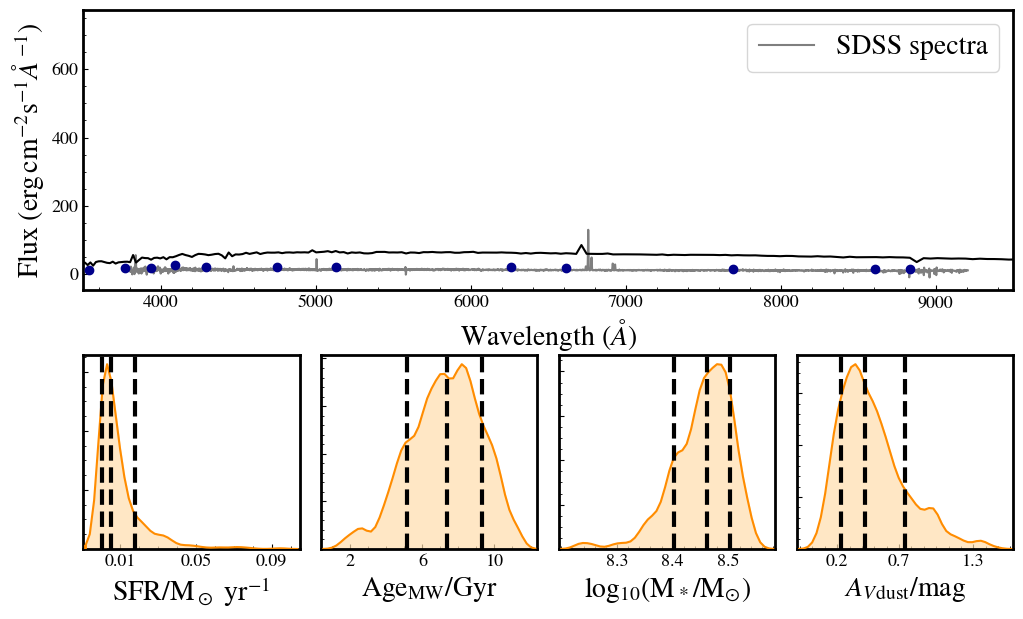

In [19]:
import numpy as np 
import bagpipes as pipes
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from astropy.io import fits

plt.close()

fig = plt.figure(figsize=(12, 7))
gs = mpl.gridspec.GridSpec(7, 4, hspace=3., wspace=0.1)

ax1 = plt.subplot(gs[:4, :])

mask = (fit.galaxy.photometry[:, 1] > 0.)
upper_lims = fit.galaxy.photometry[:, 1] + fit.galaxy.photometry[:, 2]
ymax = 1.05*np.max(upper_lims[mask])
y_scale = int(np.log10(ymax))-2
redshift = fit.fitted_model.model_components["redshift"]
log_wavs = np.log10(fit.posterior.model_galaxy.wavelengths*(1.+redshift))
log_eff_wavs = np.log10(fit.galaxy.filter_set.eff_wavs)
spec_post_median = np.percentile(fit.posterior.samples["spectrum_full"],
                                  (50), axis=0).T*10**-y_scale

#spec_post = np.percentile(fit.posterior.samples["spectrum_full"],
#                                  (16, 84), axis=0).T*10**-y_scale

#spec_post = spec_post.astype(float)  # fixes weird isfinite error

#ax1.plot(log_wavs, spec_post[:, 0], color="navajowhite", zorder=3)

#ax1.plot(log_wavs, spec_post[:, 1], color="navajowhite", zorder=3)

#ax1.fill_between(log_wavs, spec_post[:, 0], spec_post[:, 1], zorder=3, color="navajowhite", linewidth=0)

ax1.plot(10**log_wavs, spec_post_median, color="black", zorder=4)
#pipes.plotting.add_observed_photometry(fit.galaxy, ax1, zorder=3)
pipes.plotting.add_photometry_posterior(fit, ax1, zorder=2)

ax1.scatter(10**np.log10(lamd), fl_ergs_A*1e16, c='darkblue', zorder=3)
ax1.plot(10**np.log10(spec['Wavelength']), spec['Flux'], zorder=1, color='black', alpha=0.5, label='SDSS spectra')

plt.ylabel('Flux (erg$\,$cm$^{-2}$s$^{-1}$$\\AA^{-1}$)')
plt.xlabel('Wavelength ($\\AA$)')

#ax1.set_ylim(0,30)
ax1.set_xlim(3500,9500)
ax1.legend()


labels = ["sfr", "mass_weighted_age", "stellar_mass", "dust:Av"]
post_quantities = dict(zip(labels, [fit.posterior.samples[l] for l in labels]))

axes = []
for i in range(4):
    axes.append(plt.subplot(gs[4:, i]))
    pipes.plotting.hist1d(post_quantities[labels[i]], axes[-1], smooth=True, label=labels[i])

plt.show()

#plotar as magnitudes do sloan também
#verificar se o espectro tem alguma correção ou é o fluxo em 3 segundos de arco
#pegar magnitude do sloan do vizier
#o nosso é 3 segundos de arco de diametro
#olhar S/N das galáxias da amostra